In [1]:
#https://medium.com/@mishra.thedeepak/doc2vec-simple-implementation-example-df2afbbfbad5

In [28]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

import matplotlib.pyplot as plt

data = pd.read_csv('sentiment.csv')
# Keeping only the neccessary columns
data = data['text']

In [29]:
n_samples = 1000

In [4]:
len(data)

13871

In [5]:
#perform doc2vec embeddings on comments with gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize

In [30]:
sample_data = data[:n_samples]

In [31]:
tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(i)]) for i, _d in enumerate(sample_data)]

In [32]:
max_epochs = 100
vec_size = 20
alpha = 0.025

model = Doc2Vec(vector_size=vec_size,
                alpha=alpha, 
                min_alpha=0.00025,
                min_count=1,
                dm =1)
  
model.build_vocab(tagged_data)

for epoch in range(max_epochs):
    print('{0}'.format(epoch), end =" ")
    model.train(tagged_data,
                total_examples=model.corpus_count,
                epochs=model.epochs)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

model.save("d2v.model")
print("Model Saved")

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 Model Saved


In [41]:
model= Doc2Vec.load("d2v.model")
#to find the vector of a document which is not in training data
test_data = word_tokenize("hello how are you".lower())
v1 = model.infer_vector(test_data)
print("inferred docvector for 'hello how are you': ", v1)

print("most similar docvectors to '1': ",model.dv.most_similar('1'))

print("docvector of '1': ",model.dv['1'])

inferred docvector for 'hello how are you':  [ 0.12485341 -0.15427384 -0.04506175  0.14598052 -0.02237878  0.03607924
 -0.05977698  0.08379944 -0.21985105  0.20465533 -0.00393998 -0.07719157
 -0.0143216   0.05960601  0.2567506   0.14320427  0.17481554 -0.0230039
 -0.12438709 -0.20797655]
most similar docvectors to '1':  [('476', 0.9135863780975342), ('823', 0.7493131756782532), ('97', 0.7486377358436584), ('306', 0.7442463636398315), ('722', 0.7395771145820618), ('159', 0.7245171070098877), ('699', 0.7154500484466553), ('507', 0.7113190293312073), ('778', 0.7016569375991821), ('931', 0.7006017565727234)]
docvector of '1':  [-0.09319167  1.9649258   3.5777512   7.269887    3.8386075  -0.7242054
 -3.449308   -1.2642957  -1.1425357   2.875364    2.8563194  -1.8231108
 -3.7073267   3.298729    5.567767   -4.059747    5.925669   -3.4105186
 -0.67398995 -7.692429  ]


In [34]:
doc_vectors = {doc:model.infer_vector(word_tokenize(doc.lower())) for doc in sample_data}

In [36]:
list(doc_vectors.values())[0]

array([ 0.1563549 ,  0.06863876,  0.18866497,  0.235236  , -0.15561382,
       -0.04745052,  0.19752106,  0.39817905, -0.363328  ,  0.09104344,
        0.2323095 , -0.2284397 ,  0.30335993,  0.0384297 ,  0.36481243,
        0.1490824 ,  0.53249925, -0.11007161, -0.30882725, -0.39180014],
      dtype=float32)

In [43]:
#perform k-means clustering on embedded documents

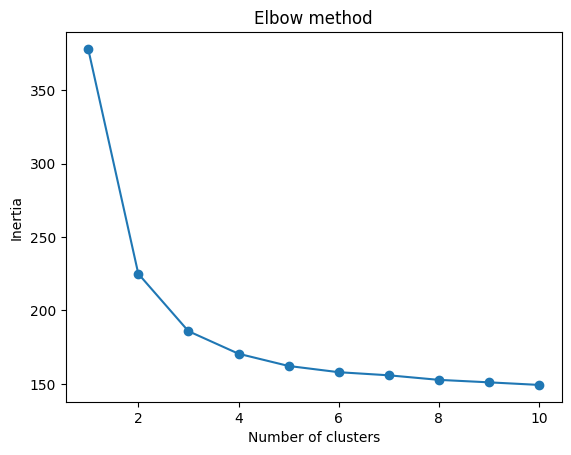

In [42]:
from sklearn.cluster import KMeans

data = list(doc_vectors.values())
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [87]:
num_clusters = 3
cluster_labels = [i for i in range(num_clusters)]

In [45]:
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(data)

KMeans(n_clusters=3)

In [46]:
#find centroids. compute bigram closest to centroid

In [47]:
centroids  = kmeans.cluster_centers_; centroids

array([[ 0.09049463,  0.06481312,  0.3499924 ,  0.30235439, -0.20442515,
        -0.13232426,  0.201692  ,  0.49736772, -0.48248615,  0.12051179,
         0.43814685, -0.45536088,  0.41413225,  0.12453336,  0.52890829,
         0.38743508,  0.8600869 , -0.18077684, -0.42228713, -0.66142835],
       [ 0.05072376,  0.05050968,  0.22901786,  0.1989206 , -0.14785606,
        -0.08168584,  0.13409412,  0.33001561, -0.32853659,  0.09139174,
         0.29063054, -0.29757052,  0.28919983,  0.07579833,  0.35854908,
         0.27804217,  0.59620722, -0.13424524, -0.28585948, -0.44517333],
       [ 0.0210394 ,  0.02987982,  0.12006211,  0.10898981, -0.07699187,
        -0.0323631 ,  0.07419896,  0.16226273, -0.16285973,  0.04769491,
         0.15918524, -0.16130775,  0.15380332,  0.03564023,  0.18325995,
         0.15530103,  0.31533234, -0.07103058, -0.153922  , -0.24522006]])

In [81]:
#compute distances between centroids
centroid_dists = sum([[np.linalg.norm(centroids[i]-centroids[j]) for j in range(i+1,num_clusters)] for i in range(num_clusters)],[]); centroid_dists

[0.5769022521099113, 1.1514845719015405, 0.5759030983374329]

In [83]:
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca_fit = pca.fit_transform(list(doc_vectors.values()))

explained_variance = pca.explained_variance_ratio_

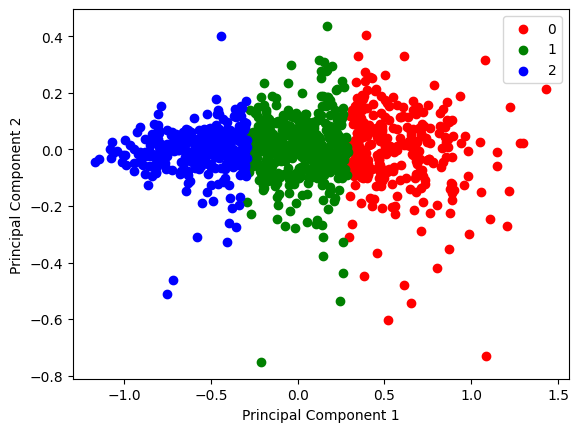

In [123]:
# plot the first two principal components with labels
pca_labeled = list(zip(pca_fit,kmeans.labels_))
colors = ["r", "g", "b"]
labels = ["Class 1", "Class 2", "Class 3"]
for label, color in zip(cluster_labels, colors):
    pca_fit_label = [pt[0] for pt in pca_labeled if pt[1] == label]
    pca_fit_i_x = np.array(pca_fit_label).transpose()[0]
    pca_fit_i_y = np.array(pca_fit_label).transpose()[1]
    plt.scatter(pca_fit_i_x, pca_fit_i_y, color=color, label=label)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

In [48]:
#build vocabulary
vocab = []
for doc in sample_data:
    vocab += word_tokenize(doc.lower())
vocab = list(set(vocab))

In [49]:
#a selection of poliical words 
political_keywords = [
    "democracy", "republic", "monarchy", "constitution", "senate", "parliament",
    "legislature", "bill", "law", "amendment", "veto", "executive", "judiciary",
    "congress", "cabinet", "prime", "president", "governor", "mayor", "election",
    "ballot", "referendum", "campaign", "lobby", "politician", "party", "coalition",
    "majority", "minority", "opposition", "incumbent", "candidate", "policy", "platform",
    "ideology", "socialism", "capitalism", "communism", "fascism", "nationalism",
    "populism", "liberalism", "conservatism", "progressivism", "federalism", "state",
    "municipality", "autonomy", "centralization", "devolution", "impeachment", "coup",
    "revolution", "sanction", "diplomacy", "treaty", "alliance", "sovereignty", "bureaucracy",
    "civil", "liberty", "freedom", "justice", "equality", "taxation", "welfare", "healthcare",
    "education", "defense", "security", "immigration", "trade", "tariff", "budget", "deficit",
    "debt", "regulation", "deregulation", "policy", "interest", "NGO", "PAC", "grassroots",
    "superpower", "diplomacy", "NATO", "UN", "electoral", "gerrymandering", "filibuster",
    "constituent", "suffrage", "pluralism", "bipartisanship", "caucus", "midterms",
    "progressive", "liberal", "conservative", "leftist", "right-wing", "vote", "redistricting"
]

In [50]:
#create unique bigrams from list of political words
bigrams = []
for i in range(len(political_keywords)):
    for j in range(i+1,len(political_keywords)):
        bigrams.append(political_keywords[i] + " " + political_keywords[j])

In [51]:
bigram_vecs = {bigram:model.infer_vector(word_tokenize(bigram.lower())) for bigram in bigrams}

In [52]:
list(bigram_vecs.values())[0]

array([-1.0685058e-02,  4.0679123e-02, -1.3806281e-02, -9.0395054e-03,
        4.2336915e-02,  3.8416465e-03,  4.1855739e-05,  2.6914267e-02,
        3.7526339e-03,  1.4597979e-02, -1.2913307e-03, -8.7603919e-02,
       -7.4332017e-03, -1.3096359e-02,  4.2915903e-02,  4.8450109e-02,
        3.1959109e-02, -3.5727963e-02, -1.1300223e-02, -1.1550090e-02],
      dtype=float32)

In [53]:
#define cosine similarity
from numpy.linalg import norm
def similarity(v,w):
    return np.dot(v,w)/(norm(v)*norm(w))

In [54]:
#find closest bigram to centroid
nearest_bigram_to_centroid = []
for centroid in centroids:
    min_dist = 2
    nearest_bigram = ""
    for bigram, embedding in bigram_vecs.items():
        dist = similarity(centroid, embedding)
        if dist < min_dist:
            min_dist = dist
            nearest_bigram = bigram
    nearest_bigram_to_centroid.append((nearest_bigram,min_dist))

In [55]:
nearest_bigram_to_centroid

[('justice deficit', -0.7100301603826024),
 ('deficit progressive', -0.7077195063889256),
 ('deficit progressive', -0.7080219975376786)]

In [ ]:
#method 2) use TF-IDF, or do a frequency count of top two most common words in cluster
#method 3) use word embeddings to compute distance from word to list of words, take closest words

In [56]:
labeled_data = zip(sample_data,kmeans.labels_)

In [57]:
#build vocabulary
cluster_vocab = [[] for centroid in centroids]
for doc, label in list(labeled_data):
    cluster_vocab[label] += word_tokenize(doc.lower())
cluster_vocab = [list(set(vocab)) for vocab in cluster_vocab]

In [58]:
len(cluster_vocab[2])

1639

In [59]:
from collections import Counter
cluster_counts = Counter(cluster_vocab[0])

In [60]:
import spacy
nlp=spacy.load("en_core_web_lg")

In [61]:
nlp("hello").similarity(nlp("hi"))

0.5797264417406982

In [62]:
#define function which measures distance to a set of words using word embeddings and cosine similarity
def dist_to_wordset(keyword,wordset):
    return min([nlp(keyword).similarity(nlp(word)) for word in wordset])

In [64]:
dist_to_wordset(political_keywords[0],cluster_vocab[0])

/var/folders/4d/rp7dhwss6znf18sks0v304d80000gn/T/ipykernel_4872/4047510694.py:3: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  return min([nlp(keyword).similarity(nlp(word)) for word in wordset])


-0.263570855730982

In [65]:
#compute the political keyword with the closest distance
#this is essentially computing the Hausdorff distance between these two sets
def closest_keyword(keywords,wordset):
    max_dist = -2
    max_keyword = ""
    for keyword in keywords:
        dist = dist_to_wordset(keyword,wordset)
        if dist > max_dist:
            max_dist = dist
            max_keyword = keyword
    return (max_keyword,max_dist)

In [ ]:
closest_keyword(political_keywords[:3],cluster_vocab[0])